In [ ]:
# daniel_luft-martinez_6.ipynb

In [16]:
import pandas as pd
import numpy as np
import string
import py2neo
import json
import random
import geopandas as gpd
import pandas as pd
import pandas_bokeh
import geopy
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import string
import pygeocoder



In [17]:
plt.rc('figure', figsize=(80, 80))

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
#world.plot()

In [19]:
raw_pins = open('A_PINS.txt')
pin_data = json.load(raw_pins)

In [20]:
nodes = []
coords = []
for node, coord in list(pin_data.items()):
    nodes.append(node)
    coords.append(coord)

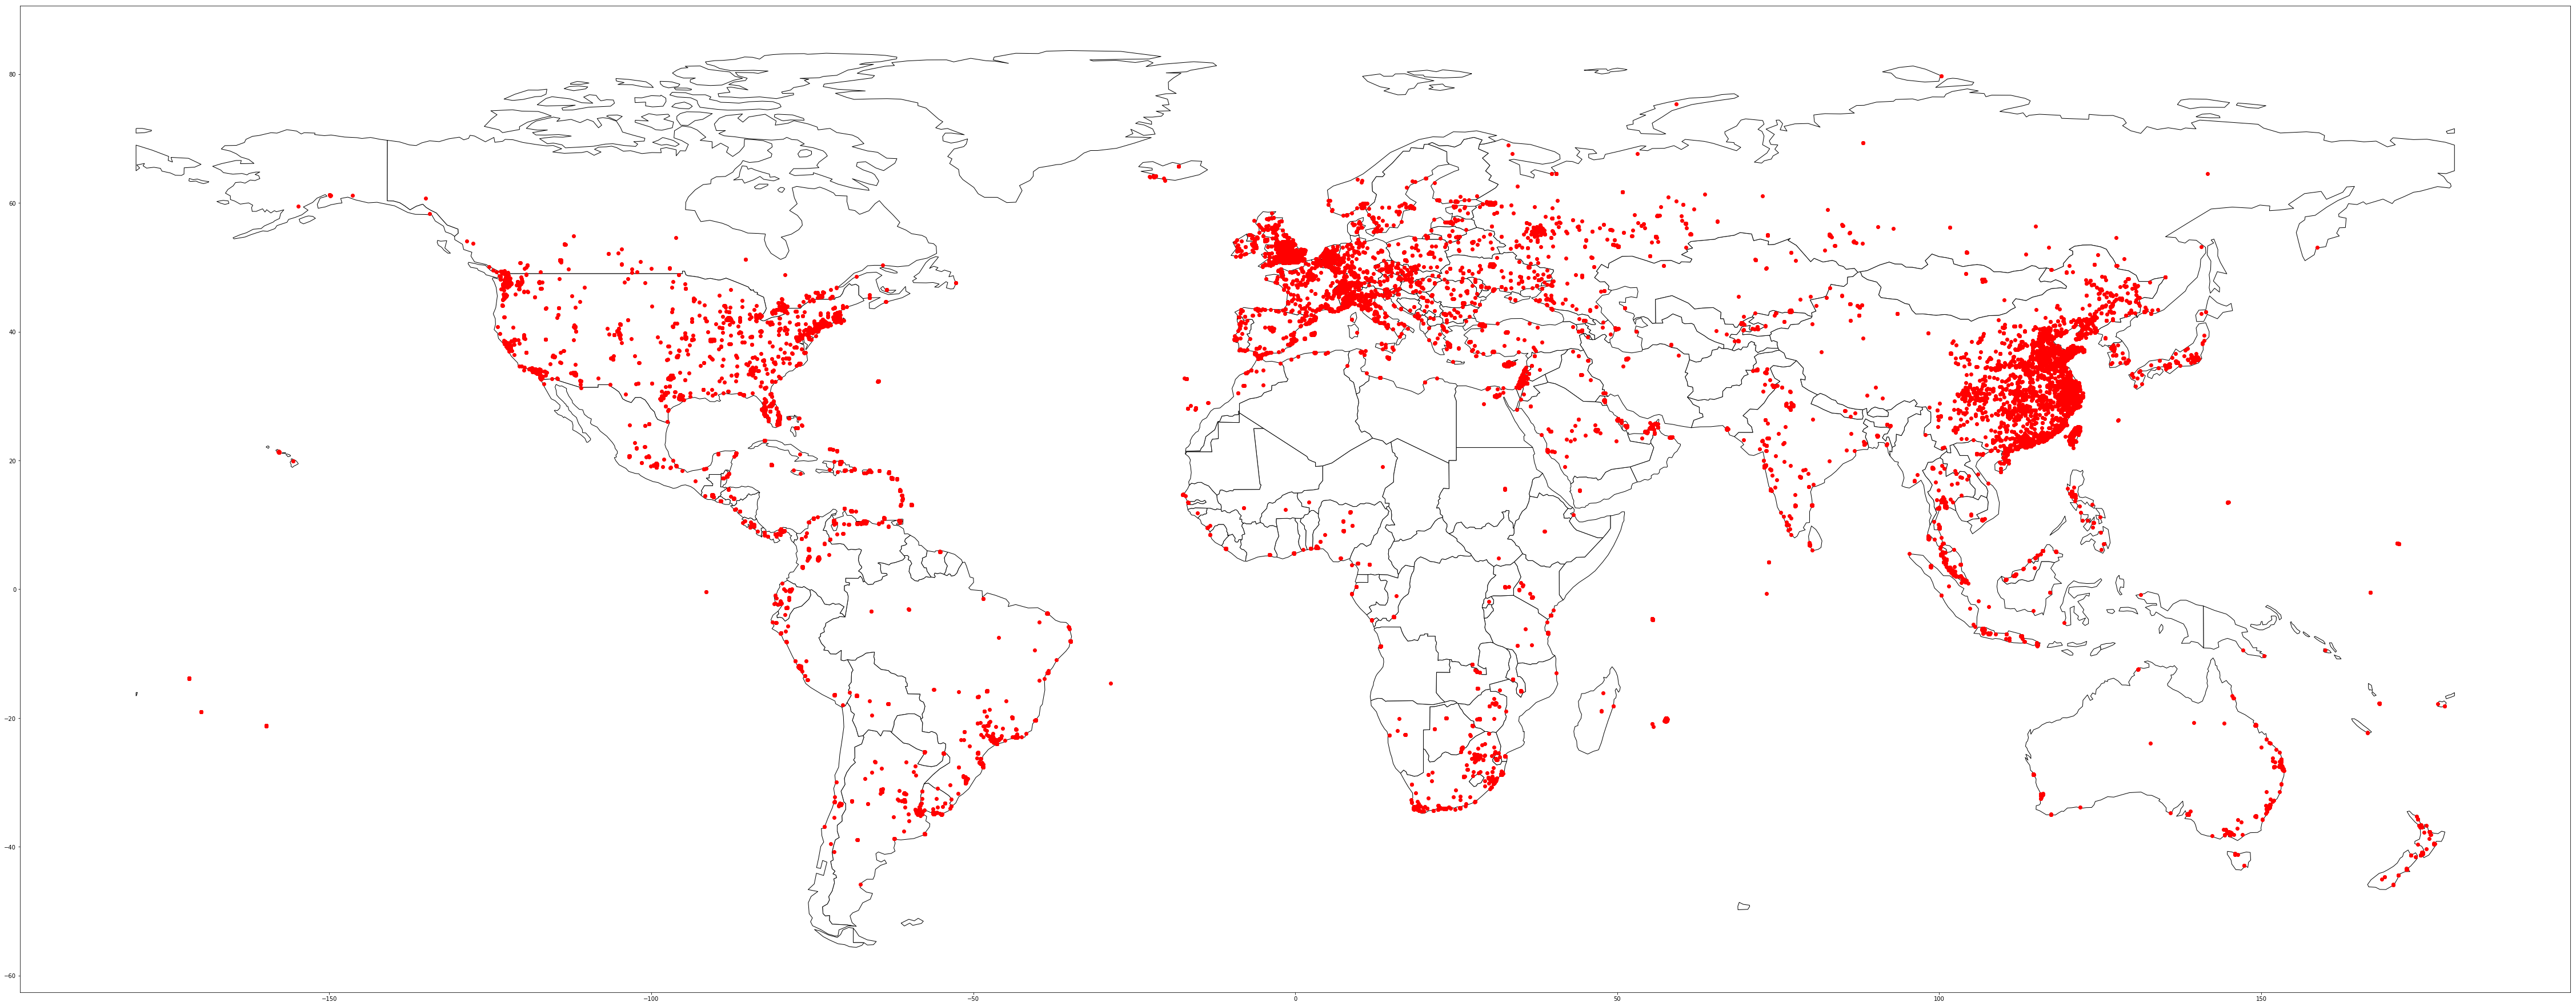

In [31]:
pin_df  = pd.DataFrame(coords, columns=['lat','lon'])
pin_gdf =  gpd.GeoDataFrame(pin_df, geometry=gpd.points_from_xy(pin_df.lon, pin_df.lat))
ax = world.plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
pin_gdf.plot(ax=ax, color='red')

plt.show()

In [32]:
nac_df = pd.read_csv('name_address_coords.csv')
nac_df
# nac_df = nac_df.drop(nac_df.columns[[0]], axis=1) 
# nac_df.columns = ["name", "address", "lat", 'lon']
# nac_df.to_csv('Name_address_coords.csv', index=False)

,name,address,lat,lon
0,"CARPENTER NELSON & CO., LTD.",EUROFIN SERVICES S.A. P.O.BOX 6003 LAUSANNE 1...,46.519291,6.638243
1,GOLDEN NET INTERNATIONAL LIMITED,AKMJ CONSULTING SERVICES LIMITED 20/F.; BANGKO...,0.000000,0.000000
2,SEG MECHANICAL LTD.,EUROFIN SERVICES S.A. P.O.BOX 6003 LAUSANNE 1...,46.519291,6.638243
3,HF CAPITAL RISK INC.,ANDBANC GRUP AGRICOL REIG C/ MANUEL CERQUEDA ...,42.511459,1.535128
4,SYREN LIMITED,ICS INTERNATIONAL CONSULTANCY SERVICES CARREFO...,46.200890,6.155895
5,IEP S.A.,ANDBANC GRUP AGRICOL REIG C/ MANUEL CERQUEDA ...,42.511459,1.535128
6,PROPERTY DEVELOPMENT FINANCE INC.,J.S.S. JEROME S. SCHACHTER P.O.B 43135 JERUSA...,31.768319,35.213710
7,KENDON REAL ESTATE LIMITED,EUROFIN SERVICES S.A. P.O.BOX 6003 LAUSANNE 1...,46.519291,6.638243
8,INTERNATIONAL RACE PUBLICITY LTD.,ANDBANC GRUP AGRICOL REIG C/ MANUEL CERQUEDA ...,42.511459,1.535128
9,DUNSTONE INCORPORATED,DUNSTONE INCORPORATED MOSSACK FONSECA & CO. (S...,-13.834234,-171.770798


In [15]:
# nac_df
cum_person_stuff = {}
person_stuff = {}
with open('cumPeopleData.json') as json_file:
    cum_person_stuff = json.load(json_file)
print(len(cum_person_stuff))
for key,value in cum_person_stuff.items():
    for k,v in value.items():
        
        #print(k, end=' ')
        #print(v)
        person_stuff[k] = v
print(len(person_stuff))

9
775


In [ ]:
from fuzzywuzzy import process

fuzzy_match = {}
# Key : Name in daniel data
# Value : NameTitle in hoa data


In [30]:
all_names = nac_df['name'].to_list()
for name_title,stuff in person_stuff.items():
    name = name_title.split(',')[0]
    highest = process.extractOne(name,all_names)
    fuzzy_match[highest[0]]=[name,stuff]
    print(name, end='|||')
    print(highest)

Mauricio Macri|||('Mauricio Soto Limited Corp.', 86)
Salman of Saudi Arabia|||('SCIENTIFIC TECHNOLOGICAL PRODUCTS OF ASIA LIMITED', 86)
Khalifa bin Zayed Al Nahyan|||('Sheikh Khalifa bin Zayed AL Nahyan', 95)
Petro Poroshenko|||('Petro Poroshenko', 100)
Rafael Correa|||('CARLOS RAFAEL MORÁN DÁVILA', 86)
Hamad bin Khalifa Al Thani|||('Dar Al Mustawred Asset Holdings Limited', 86)
Ahmed al-Mirghani|||('IRG', 90)
Sigmundur Davíð Gunnlaugsson|||('Sigmundur David Gunnlaugsson', 96)
Silvio Berlusconi|||('WILLIAM SILVIO SOLDAN AND CHRISTIAN SILVIO SOLDAN SÜLLER', 86)
Bidzina Ivanishvili|||('Bidzina Ivanishvili', 100)
Pavlo Lazarenko|||('LO, LO', 86)
Ion Sturza|||('Ion Sturza', 100)
Ayad Allawi|||('AYAD H. ALLAWI', 95)
Ali Abu al-Ragheb|||('HEB', 90)
Benazir Bhutto|||('ENA', 90)
Hamad bin Jassim bin Jaber Al Thani|||('Mrs. Lara AL-DAFTARI', 86)
Nawaz Sharif|||('AMIR HAMZAH BIN MD SHARIF', 86)
Malcolm Turnbull|||('DR. PHILIP MALCOLM HALLWOOD', 86)
Abdeslam Bouchouareb|||('HO HO', 86)
Jordi Cinc

Pablo Crespo|||('JUAN PABLO CARRASCO DE GROOTE', 86)
Anton Pryhodsky|||('OLIVER WENZEL ANTON HAJEK', 86)
Michael Ashcroft|||('PAUL MICHAEL PREUVENEERS', 86)
George Magan|||('George Hill Nominees Limited', 86)
Jacob Rees-Mogg|||('Benedicte Jeanne Genevieve JACOB y Jean Francois Rene Fernand JACOB', 86)
James Sassoon|||('STEPHEN DAVID JAMES NEWMAN', 86)
Carlos Quintanilla Schmidt|||('CARLOS CURE', 86)
Ashok Gehlot|||('Gauri Ashok Pamnani', 86)
Prabowo Subianto|||('SUBIANTO ARPAN SUMODIKORO', 86)
Sandiaga Salahuddin Uno|||('SANDIAGA SALAHUDDIN UNO', 100)
Khalid bin Sultan|||('LI Li', 86)
Guillermo Ortega Alonso|||('GUILLERMO ARIAS', 86)
Xavier Trias|||('MR. François-Xavier NUTTALL', 86)
Wesley Clark|||('Patrick George Clark & Sherrill June McKinlay', 86)
Gary Cohn|||('GARY BUTTERWORTH', 86)
Jon Huntsman Jr.|||('DONALD FRANKLIN MCLANE JR', 86)
Randal Quarles|||('Mr STOTT Paul Randal Dursley', 86)
Daniel Muñoz|||('FERNANDO DANIEL MUÑOZ MERIZALDE', 90)
Alessandra Minnicelli|||('LI Li', 86)
M

Tsai Ying-yang|||('YANG, YANG', 95)
|||('CARPENTER NELSON & CO., LTD.', 0)
Sarah|||('SARAH  FRANCIS   ALISON  LYONS', 90)
Ian Cameron|||('Julian Cameron Bowden', 90)
David Sharples|||('STEPHEN DAVID JAMES NEWMAN', 86)
Mark Thatcher|||('PRO-MARK SAVERS CLUB LIMITED', 86)
Kojo Annan|||('KOJO ANNAN', 100)
Stephen Bronfman|||('STEPHEN DAVID JAMES NEWMAN', 86)
Ibrahim Mahama|||('Ibrahim Abdullah A Almunajem', 86)
Mareva Grabowski|||('EVA GROSS', 70)
Tommy and Mamiek Suharto|||('TRIDENT OIL NAVIGATION AND INVESTMENT CORPORATION', 86)
Jonathan Kolber|||('Jonathan Kollek', 87)
Noor Al-Hussein|||('Dar Al Mustawred Asset Holdings Limited', 86)
Ana Kolarević|||('SANTA ANA FINANCIAL SERVICES LTD.', 86)
Olga Shuvalova|||('OLGA COFIÑO CASTILLO DE ARRIOLA', 86)
Santiago Alarcó|||('MANOLO GUNDEMARO ARENAS SANTIAGO', 86)
Blanca de la Mata y Pobes|||('VAL DE LOIRE LLC', 86)
Corinna zu Sayn-Wittgenstein|||('ZU LI', 86)
Erkam and Bulent Yildirim|||('TRIDENT OIL NAVIGATION AND INVESTMENT CORPORATION', 86)


Shahzeb Budhani|||('HAN SHI', 74)
Alberto Cortina and his cousin Alberto Alcocer|||('ALBERTO CORTI', 90)
Javier de la Rosa and his daughter|||('VAL DE LOIRE LLC', 86)
Miguel Blesa|||('MIGUEL EDGARDO LANDA BARSALLO', 86)
Eufemiano Fuentes|||('JOSE DOMINGO FUENTES LAYLLE', 86)
Carlos Ortega|||('CARLOS RAFAEL MORÁN DÁVILA', 86)
Edmundo Rodríguez Sobrino|||('FRANCISCO JAVIER RODRÍGUEZ MAZARIEGOS', 86)
Eugenio Mora Olivella|||('Mr. Eugenio MORA OLIVELLA', 95)
Manuel Fernández de Sousa|||('VAL DE LOIRE LLC', 86)
Demetrio Carceller Coll and his sons|||('Mr. Demetrio CARCELLER COLL', 89)
Martinón family|||('FORTU FAMILY BRITAIN INC', 86)
Escarrer family|||('FORTU FAMILY BRITAIN INC', 86)
Riu family|||('FAMILY TRIBE LTD.', 86)
Santiago Rosselló|||('MANOLO GUNDEMARO ARENAS SANTIAGO', 86)
Javier del Valle Petersfeld|||('Mr. Francisco Javier DEL VALLE PETERSFELDT', 90)
Pretus Becerra|||('Mr. Gabriel-José Pretus Becerra', 90)
Javier Sanchís (CEO)|||('Mariano Javier Civile (1) and Oscar Luis Civile,

Jim Mellon|||('FREDERIC JIM RAYMOND MAUGER', 86)
Michael Cyprian Waller-Bridge|||('MR MICHAEL ATKINSON', 86)
Sheldon Adelson|||('RICHARD WILLIAM CORBETT TURNER AND JANE BEST as Trustees of the TJR Sheldon 2002 Settlement', 86)
Paul Allen|||('PAUL ENTERPRISES INC.', 86)
Thomas J. Barrack Jr.|||('R.E.O.J. REAL STATE CORPORATION', 86)
J. Christopher and Robert Burch|||('TRIDENT OIL NAVIGATION AND INVESTMENT CORPORATION', 86)
Jeffrey Epstein|||('EPSTEIN AG', 86)
John Augustine Hearst|||('JOHN BROWN LTD.', 86)
Carl Icahn|||('Carl James Bossino', 86)
Peter Karmanos|||('KARL PETER BLANK and/or MARIA MERCEDES GIRON DE BLANK - Joint Tenancy with Rights of Survivorship.', 86)
Charles and David Koch|||('TRIDENT OIL NAVIGATION AND INVESTMENT CORPORATION', 86)
Robert Kraft|||('MARTIN JOSEPH ROBERT RONALD VANLIERDE', 86)
Robert Mercer|||('MERCER INTERNATIONAL S.A.', 86)
Pierre Omidyar|||('PY Nicolas Jean-Pierre', 86)
Stephen Pagliuca|||('STEPHEN DAVID JAMES NEWMAN', 86)
Geoffrey Palmer|||('PALMER AS

DePauw University|||('Institute of Oil & Gas, Peking University Limited', 86)
Duke University|||('Institute of Oil & Gas, Peking University Limited', 86)
Indiana University|||('Institute of Oil & Gas, Peking University Limited', 86)
Johns Hopkins University|||('RICHARD HOPKINS', 86)
Northeastern University|||('EASTERN', 90)
Ohio State University|||('CHINA STATE CONSTRUCTION ENGINEERING CORPORATION', 86)
Princeton University|||('PRINCETON DIGITAL DISPLAY, INC.', 86)
Purdue University|||('Institute of Oil & Gas, Peking University Limited', 86)
Reed College|||('JS CLARK PA REED & E TRICOT AS TRUSTEES OF THE FENCHURCH NO. 2 TRUST', 86)
Rutgers University|||('Institute of Oil & Gas, Peking University Limited', 86)
Stanford University|||('STANFORD LIMITED OF TRUST HOUSE', 86)
Syracuse University|||('Institute of Oil & Gas, Peking University Limited', 86)
Texas Christian University|||('CHRISTIAN GIOVANNI EMILIO CARIAS MANSILLA', 86)
Texas Tech University|||('SAMA TECH INC.', 86)
University of

In [36]:
print(len(fuzzy_match))

587


In [35]:
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)


In [37]:
with open('new_fuzzed_match.json', 'w') as outfile:
    json.dump(fuzzy_match, outfile)

In [38]:
with open('new_fuzzed_match.json') as json_file:
    fuzzy_match = json.load(json_file)
print(len(fuzzy_match))

587


In [46]:
fuzz_match = fuzzy_match.copy()


In [47]:
print(len(fuzz_match))
print(len(fuzzy_match))


587
587


In [49]:
interesting = []
ind_col_name_nac_df = pd.read_csv('Name_address_coords.csv', index_col='name' )
for person_d,person_h in fuzzy_match.items():
    print(person_d)
    
    print(person_h)
    row = ind_col_name_nac_df.loc[[person_d]]
    interesting.append([row, person_h[1][0],person_h[1][1]])
print(interesting)

Mauricio Soto Limited Corp.
['Mauricio Macri', ['https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Presidente_Macri_en_el_Sillon_de_Rivadavia_%28cropped%29.jpg/220px-Presidente_Macri_en_el_Sillon_de_Rivadavia_%28cropped%29.jpg', 'https://en.wikipedia.org/wiki/Mauricio_Macri']]
SCIENTIFIC TECHNOLOGICAL PRODUCTS OF ASIA LIMITED
['University of Texas System', ['https://upload.wikimedia.org/wikipedia/en/thumb/2/20/UofTsystem_seal.svg/150px-UofTsystem_seal.svg.png', 'https://en.wikipedia.org/wiki/University_of_Texas_System']]
Sheikh Khalifa bin Zayed AL Nahyan
['Khalifa bin Zayed Al Nahyan', ['https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Sheikh_Khalifa.jpg/220px-Sheikh_Khalifa.jpg', 'https://en.wikipedia.org/wiki/Khalifa_bin_Zayed_Al_Nahyan']]
Petro Poroshenko
['Roshen', ['https://upload.wikimedia.org/wikipedia/en/thumb/8/81/Roshen.jpg/150px-Roshen.jpg', 'https://en.wikipedia.org/wiki/Roshen']]
CARLOS RAFAEL MORÁN DÁVILA
['Carlos Ortega', ['https://upload.wikimedia.org/

PAUL MICHAEL PREUVENEERS
['Paul Gauselmann', ['https://www.intergameonline.com/uploads/images/posts/Paul_Gauselmann_45c48c.jpg', 'no url']]
Dr. Tony A. Puglisi
['Tony Baldry', ['https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Professor_Stefan_Wolff%2C_Tony_Baldry_MP%2C_Dr_Raad_Alkadiri.jpg/220px-Professor_Stefan_Wolff%2C_Tony_Baldry_MP%2C_Dr_Raad_Alkadiri.jpg', 'https://en.wikipedia.org/wiki/Tony_Baldry']]
MICHAEL MATES
['Michael Mates', ['no image found', 'https://en.wikipedia.org/wiki/Michael_Mates']]
Mr Noel Mason Robert French, Ms Pamela Streek, Ms Rosemary Pamela Jane Streek
['Pamela Sharples', ['https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Baroness_Sharples.png/220px-Baroness_Sharples.png', 'no url']]
GABRIELLE KAY FIALKOFF
['Gabrielle Fialkoff', ['https://www1.nyc.gov/assets/home/images/mayor/official-bio/gabrielle-fialkoff-hires.png', 'no url']]
Livio Canuto De Abreu Duarte
['Sergio Abreu', ['https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Sergi

Yu Na
['Masamitsu Naito', ['https://www.straitstimes.com/sites/default/files/styles/article_pictrure_780x520_/public/articles/2017/11/07/collage07_0.jpg?itok=-OqUdGFF&timestamp=1510005983', 'no url']]
KYOTA YAMADA
['Taro Yamada', ['https://vignette.wikia.nocookie.net/yandere-simulator/images/3/3f/SenpaiRecent.png/revision/latest/scale-to-width-down/210?cb=20190103013401', 'no url']]
Maria del Milagro Gamboa Miranda Passport No.XXXXXXXXX
['Joaquín Gamboa Pascoe', ['https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/PRI_logo_%28Mexico%29.svg/15px-PRI_logo_%28Mexico%29.svg.png', 'https://en.wikipedia.org/wiki/Joaqu%C3%ADn_Gamboa_Pascoe']]
Oluwatoyin Saraki
['Bukola Saraki', ['https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Senator_Saraki_%288509524281%29.jpg/220px-Senator_Saraki_%288509524281%29.jpg', 'https://en.wikipedia.org/wiki/Bukola_Saraki']]
ALEXEY PETRASHKEVICH
['Alexey Ezubov', ['http://www.salitapromotions.com/wp-content/uploads/2014/04/Alexey-Zubov.jpg', 'no ur

['Hassan Bhutto', ['https://pbs.twimg.com/profile_images/3638008046/d4be130241ee3a1c5a51bbbbab3c3140_400x400.jpeg', 'no url']]
Samina Durrani
['Samina Durrani', ['https://media.licdn.com/dms/image/C4D03AQEHJ2DRI7i5tA/profile-displayphoto-shrink_200_200/0?e=1570060800&v=beta&t=plL7rqE2kiYm2Buosd_QQk9J9FHn2XyxDc1yzepPnvQ', 'no url']]
Waseem Gulzar Chaudhry
['Waseem Gulzar', ['https://pbs.twimg.com/profile_images/860474313899737088/1b86nN-E_400x400.jpg', 'no url']]
Maryam Ahmed Ali El-Mirghani
['Maryam Nawaz', ['https://www.thenews.com.pk//assets/uploads/updates/2019-12-09/580905_7729358_Maryam-Nawaz_updates.jpg', 'https://en.wikipedia.org/wiki/Maryam_Nawaz']]
Dr. Muller Investment Holdings LLC
['Dr. Iqbal Saifullah', ['http://kih.com.pk/wp-content/uploads/2019/01/iqbal-shb.jpg', 'no url']]
JEHANGIR SAIFULLAH KHAN
['Jehangir Saifullah Khan', ['https://newslinemagazine.com/wp-content/uploads/2016/05/TEN-Salim-Saifullah-NEW.jpg', 'no url']]
ZAIN ASHRAF MUKATY
['Zain Sukhera', ['https://a4-i

Simone Zavaray Poonawalla
['Zavaray Poonawalla', ['https://i.ytimg.com/vi/HzFEQhae-sA/hqdefault.jpg', 'no url']]
ROBBYANTO BUDIMAN
['Robbyanto Budiman', ['http://indonesiatatler.com/images/i/celebrity-20151016152501-ScreenShot2015-10-16at15.24.23_cropped_300x300.png', 'no url']]
LIKE RANI IMANTO RACHMAT
['Rani Imanto Rachmat', ['https://specials-images.forbesimg.com/imageserve/5654ec55e4b0ffa7afe7763b/416x416.jpg?background=000000&cropX1=119&cropX2=671&cropY1=81&cropY2=634', 'no url']]
GARIBALDI THOHIR
['Garibaldi Thohir', ['https://specials-images.forbesimg.com/imageserve/5a19b49da7ea432f2e7401ee/416x416.jpg?background=000000&cropX1=1622&cropX2=3444&cropY1=259&cropY2=2080', 'no url']]
SEAN ALAN CHARTERIS
['Sean Mulryan', ['https://www.irishtimes.com/polopoly_fs/1.3877750.1556735706!/image/image.jpg_gen/derivatives/box_620_330/image.jpg', 'no url']]
IDAN OFER
['Idan Ofer', ['https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Idan_Ofer_%286782129355%29_%28cropped%29.jpg/220px-Ida

Anders Wall
['Anders Wall', ['no image found', 'no url']]
ROKSANDA ILINCIC BUENO DE MESQUITA
['Roksanda Ilincic', ['https://wordpress-mnei139eijehv5w.netdna-ssl.com/wp-content/uploads/2018/06/the-mod-the-modist-modest-fashion-roksanda-ilincic-6.jpg', 'no url']]
PATOKH CHODIEV
['Patokh Chodiev', ['https://specials-images.forbesimg.com/imageserve/5c6cbe7d4bbe6f3a74231d28/416x416.jpg?background=000000&cropX1=1069&cropX2=3738&cropY1=0&cropY2=2667', 'no url']]
MRS. OLGA MAKAROVA
['Olga Makarova', ['no image found', 'no url']]
Gonzalo Menes Díaz Lozano
['Gonzalo Delaveau', ['http://en.mercopress.com/data/cache/noticias/54716/600x315/gonzalo-delaveau.jpg', 'no url']]
CHU KWOK HUNG, MICKY
['Micky Arison', ['no image found', 'no url']]
Mr. Christiaan Leonard de Bruyn
['Leonard Blavatnik', ['https://upload.wikimedia.org/wikipedia/commons/e/ea/Leonard_Blavatnik%2C_February_2018_%284568%29_%28cropped%29.jpg', 'no url']]
Diego Germán Balestra Barrios, Lelia María Díaz Baraibar, María Carolina Bales

MILLENIUM BROKER MANAGEMENT INTERNATIONAL LLC
['Somerset Capital Management', ['https://media.featuredcustomers.com/Company.logo/1514436554245_1_P3xFyDw.png', 'no url']]
Amazon Fund Corporation
['Amazon', ['https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Amazon_logo.svg/175px-Amazon_logo.svg.png', 'https://en.wikipedia.org/wiki/Amazon_(company)']]
HF CAPITAL RISK INC.
['Apple Inc.', ['https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Apple_logo_black.svg/80px-Apple_logo_black.svg.png', 'https://en.wikipedia.org/wiki/Apple_Inc.']]
James Thomas CORBIN-MCKENZIE
['Baker McKenzie', ['https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Baker_McKenzie_logo_%282016%29.svg/220px-Baker_McKenzie_logo_%282016%29.svg.png', 'https://en.wikipedia.org/wiki/Baker_McKenzie']]
FINE ART ADVISERS OF EUROPE S.A.
['University of Oxford', ['https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Coat_of_arms_of_the_University_of_Oxford.svg/220px-Coat_of_arms_of_the_University_of_Oxfo

NI FEI
['Nihat Kahveci', ['https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/AUT_vs._TUR_2016-03-29_%28186%29.jpg/225px-AUT_vs._TUR_2016-03-29_%28186%29.jpg', 'https://en.wikipedia.org/wiki/Nihat_Kahveci']]
MR. KURT KORKUT JOLKER
['Tayfun Korkut', ['https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Tayfun_korkut.jpg/220px-Tayfun_korkut.jpg', 'https://en.wikipedia.org/wiki/Tayfun_Korkut']]
Vladan Kovacevic
['Darko Kovačević', ['https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Darko_Kova%C4%8Devi%C4%87_%28cropped%29.jpg/150px-Darko_Kova%C4%8Devi%C4%87_%28cropped%29.jpg', 'https://en.wikipedia.org/wiki/Darko_Kova%C4%8Devi%C4%87']]
FREDERIC JOSEPH GABRIEL DUROS
['Gabriel Heinze', ['https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Gabriel_Ivan_Heinze.jpg/250px-Gabriel_Ivan_Heinze.jpg', 'https://en.wikipedia.org/wiki/Gabriel_Heinze']]
SOWANDE SERVICES LTD.
['Sander Westerveld', ['https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Sander_Westerveld_201

In [60]:
interesting_img = []
interesting_url = []
for person in interesting:
    pone = person[0].to_list()
    pone.append()
    pone = person[0].to_list()
    pone.append()

[                                                                       address  \
 name                                                                             
 Mauricio Soto Limited Corp.  MAURICIO SOTO LTDA. (ZP. 1000) SAN JOSE MATA R...   
 
                                   lat        lon  
 name                                              
 Mauricio Soto Limited Corp.  9.930897 -84.093365  ,
 ['https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Presidente_Macri_en_el_Sillon_de_Rivadavia_%28cropped%29.jpg/220px-Presidente_Macri_en_el_Sillon_de_Rivadavia_%28cropped%29.jpg',
  '<table class="infobox vcard" style="width:22em"><tbody><tr><th colspan="2" style="text-align:center;font-size:125%;font-weight:bold;font-size: 100%;"><div class="honorific-prefix" style="display:inline; font-weight: normal;"><a href="/wiki/The_Most_Excellent" title="The Most Excellent">Excelentísimo Señor</a></div><br/><div class="fn" style="display:inline-block; font-size:130%;">Mauricio Macri<

In [ ]:
# the good part
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, OpenURL, TapTool
#output_file("toolbar.html")
final_int_df = pd.read_csv('final_int_df.csv')
final_int_df.columns = ["name", "address", "lat", 'lon', 'img', 'url']
#print(final_int_df.head())
data = final_int_df
source = ColumnDataSource(
        data=final_int_df
    )

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@img" height="100" width="100"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@name</span>
                <span style="font-size: 15px; color: #966;">@name</span>
            </div>

        </div>
        """
    )

p = figure(x_axis_type="mercator", y_axis_type="mercator", plot_height = 600 , plot_width = 950, toolbar_location = None,tools=[hover,'tap','reset'],title="Mouse over the dots")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]
json_data = world.to_json()
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
p.patches('xs','ys', source = geosource, line_color = 'black', line_width = 0.25,fill_alpha = -1, fill_color={ 'transform': 'white'})



# use the "color" column of the CDS to complete the URL
# e.g. if the glyph at index 10 is selected, then @color
# will be replaced with source.data['color'][10]
url = "@url"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)



p.circle('lon', 'lat',color='red', size=5, source=source)
bokeh.io.reset_output()
output_notebook()
show(p)